# Основы математической статистики
### Базовые понятия и методы проверки статистических гипотез

### Часть 1. Описание данных

<br>

### Содержание:

1. Описание данных:
    * Нормальное распределение, выборочные оценки.
    * Проврка гипотез: ошибки первого и второго рода.
    * Статистические критерии, критерии согласия.
    * Чувствительность критерия
2. Критерии для несвязанных выборок:
    * Дисперсионный анализ.
    * Критерий Стьюдента.
    * Множественные сравнения.
3. Анализ качественных признаков:
    * Z-критерий.
    * Таблицы сопряженности: критерий $\chi^2$.
    * Точный критерий Фишера.
4. Доверительные интервалы:
    * Построение доверительных интервалов.
    * Проверка гипотез с помощью доверительных интервалов.
5. Связанные выборки, повторные измерения:
    * Парный критерий Стьюдента.
    * Новый подход к дисперсионному анализу.
6. Непараметрические критерии:
    * Критерий Манна—Уитни.
    * Критерий Уилкоксона.

<br>

<br>

<br>

**Математическая статистика** — раздел математики, разрабатывающий методы регистрации, описания и анализа данных наблюдений и экспериментов с целью построения вероятностных моделей массовых случайных явлений. Наиболее для нас интересными являются такие области математической статистики, как теория оценивания и теория проверки гипотез.

**Методы оценивания и проверки гипотез** опираются на вероятностные модели происхождения данных. Эти модели делятся на параметрические и непараметрические. В параметрических моделях предполагается, что характеристики изучаемых объектов описываются посредством распределений, зависящих от (одного или нескольких) числовых параметров. Непараметрические модели не связаны со спецификацией параметрического семейства для распределения изучаемых характеристик. В математической статистике оценивают параметры и функции от них, представляющие важные характеристики распределений (например, математическое ожидание, медиана, стандартное отклонение, квантили и др.), плотности и функции распределения и пр. Используют точечные и интервальные оценки.

### Нормальное распределение

Как было сказано ранее, характеристики объектов зачастую описываются посредством различных параметрических распределений. Самым распространенным и важным из них является нормальное распределение. Плотность нормального распределения выглядит следующим образом (определение понятий плотности, математического ожидания, дисперсии и т.д. является скорее предметом теории вероятностей, а не математической статистики, поэтому предполагается, что они уже известны читателю): 

$$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right) $$

Параметрами нормального распределения являются $\mu$ и $\sigma$, которые совпадают с математическим ожиданием и стандартным отклонением соотвественно.

Важное значение нормального распределения во многих областях науки вытекает из центральной предельной теоремы теории вероятностей. Если результат наблюдения является суммой многих случайных слабо взаимозависимых величин, каждая из которых вносит малый вклад относительно общей суммы, то при увеличении числа слагаемых распределение центрированного и нормированного результата стремится к нормальному. Этот закон теории вероятностей имеет следствием широкое распространение нормального распределения, что и стало одной из причин его наименования.

Сформулируем классическую центральную предельную теорему. Пусть $X_1...X_n...$ - бесконечная последовательность независимых одинаково распределенных случайных величин с конечным математическим ожиданием $\mu$ и дисперсией $\sigma^2$. Тогда:

$$ \frac{S_n - n\mu}{\sigma\sqrt{n}} \rightarrow N(0, 1), \:\: n \rightarrow \infty, $$

где $ S_n = \sum_{i=1}^{n}X_n $.

<br>

Введем несколько понятий:

**Генеральная совокупность** – это совокупность всех мысленно возможных объектов данного вида, относительно которых предполагается делать выводы при изучении конкретной задачи.

**Выборка (выборочная совокупность)** - совокупность случайно отобранных объектов из генеральной совокупности.

Приведем пример. Допустим мы изучаем рост жителей в каком то отдельно выбранном городе в зафиксированный момент времени. Генеральной совокупностью в данном случае будет рост **всех** жителей данного города. Если мы арссматриваем мегаполис, то число жителей может быть очень большим (миллионы человек). Очевидно, что рост каждого померить невозможно (либо очень дорого). Поэтому, в рамках данного исследования, производился бы замер роста отдельных случайно выбранных жителей данного города. Таким образом, выборкой в данном случае является известный рост этих случайно выбранных для эксперимента жителей.

Обычно исследователи очень редко имеют в распоряжении всю генеральную совокупность, поэтому приходится делать выводы исходя из существующей на данный момент выборки. Естественно, чем больше объем случайной выборки, тем лучше она отображает свойства всей совокупности.

### Генеральная совокупность

Рассмотрим понятия генеральной совокупноси и выборки подобнее. Для этого будем использовать язык Python 3:

In [11]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
def norm_hist(sample, mean=None, std=None, loc=None, bars=8):
    if loc is None:
        loc = mean
    plt.figure(figsize=(12, 6))
    plt.hist(sample, bars, alpha=0.8)
    
    handles = []
    if mean is not None:
        lineMean = plt.axvline(mean, label=('Mean = ' + str(round(mean, 2))),
                        color='r', linestyle='dashed', linewidth=1.5)
        handles.append(lineMean)
        
        if std is not None:
            lineLeft = plt.axvline(loc-std, label=('- sigma = ' + str(round(loc-std, 2))),
                               color='g', linestyle='dashed', linewidth=1.5)
            lineRight = plt.axvline(loc+std, label=('+ sigma = ' + str(round(loc+std, 2))),
                                color='g', linestyle='dashed', linewidth=1.5)
            handles.append(lineLeft)
            handles.append(lineRight)
        

        plt.legend(handles=handles)
    plt.show()

Сгенерируем генеральную совокупность. Рассмотрим гипотетичесикй город X, в котором рост 10000 жителей распределен нормально с средним 175см и стандартным отклонением 10см:

In [32]:
loc = 175
scale = 10
height_gen_pop = stats.norm(loc=loc, scale=scale).rvs(10000)
height_gen_mean = np.mean(height_gen_pop)

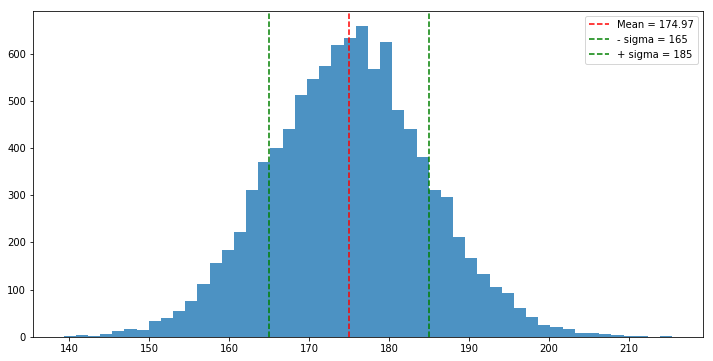

In [33]:
norm_hist(height_gen_pop, height_gen_mean, scale, loc, 50)

На графике так же отмечено среднее значение (которое совпадает с математическим ожиданием при стремлении числа объектов к бесконечности), а так же область с расстоянием не более одного стандартного отклонения от среднего. В эту область поадает примерно 68% всех значений; в область, которая отличается от среднего не более, чем на 2 стандартных отклонения попадает уже около 95% всех значений.

**Среднее значение**, определенное из генеральной совокупности, так же называют средним по совокупности: $ \mu = \frac{1}{N}\sum_{i=1}^{N}x_i $.

**Стандартное отклонение совокупности:** $ \sigma = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(x_i-\mu)} $.

**Дисперсия:** $ \sigma = \frac{1}{N}\sum_{i=1}^{N}(x_i-\mu)$.

Для распределений другого типа, отличного от нормального, рассчитывать среднее и стандартное отклонение может повлечь за собой возникновение ошибок, особенно если распределение не является симметричным. Для описание таких случаев использую медиану и квантили (процентили).

**Медиана** - это значение, которое делит распределение пополам. Половина значений больше медианы, а другая половина - меньше.

**Квантиль** - значение, которое заданная случайная величина не превышает с фиксированной вероятностью. Если вероятность задана в процентах, то квантиль называется процентилем или перцентилем. Например, для нормального распределение значение $ \mu + \sigma $ является причерно 68-ым процентилем. Медиана же является 50-ым процентилем. Строго, $\alpha$-квантиль для непрерывного распределения: $ F_X(x_{\alpha}) = \alpha $ 

### Случайная выборка из генеральной совокупности

Как уже было сказано ранее, на практике редко удается довольствоваться всеми объектами совокупности. Обычно исследователи имеют дело с некоторой случайной выборкой, то есть оценивать параметры всей совокупности, обладая только некоторым числом её объектов. Приведем пример с ростом жителей города Х. Всего в нем живут 10000 человек, однако, на проведение эксперимента было выделенно ограниченное время и удалось измерить рост только 100 человек:

In [15]:
n_of_people = 100
height_sample = np.random.choice(height_gen_pop, size=n_of_people)
sample_mean = np.mean(height_sample)
sample_std = np.std(height_sample, ddof=1)

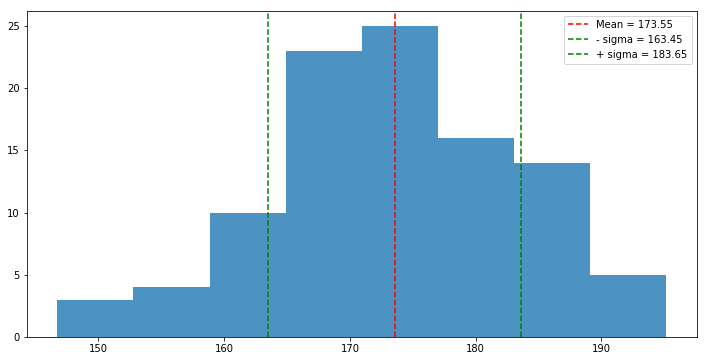

In [16]:
norm_hist(height_sample, sample_mean, sample_std)

Как и в прошлий раз, на графике есть отметки, однако в этом случае отмечены выборочные оценки среднего и стандартного отклонения.

**Выборочная оценка среднего значения:** $ \bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i $, где $n$ - размер выборки. 

Данная оценка также называется оценкой максимального правдоподобия, является несмещенной, состоятельной и эффективной. В случае выборок малого объема ($n < 11$) может быть модифицирована следующим образом: $ \bar{x}^* = \sum_{i=1}^{n}\frac{x_i}{d_i\sum_{k=1}^{n}\frac{1}{d_k}}$, где $ d_i = \sum_{j=1}^{n}(x_j - x_i)^2 $.

**Выборочная оценка стандартного отклонения:** $ s = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})} $.

Данная оценка также называется оценкой максимального правдоподобия, является несмещенной, состоятельной и эффективной. В знаменателе стоит $n-1$, для того, чтобы при малых значениях размера выборки $n < 30$ оценка являлась несмещенной. Другими словами, разброс значений в пределах выборки никогда не бывает столь большим, как во всей совокупности, и деление не на $n$, а на $n-1$ компенсирует возникающее занижение оценки стандартного отклонения.

Насколько точны выборочные оценки? Очевидно, что разные выборки будут давать разные оценки среднего и стандартного отклонения совокупности. Для характеристики точности выборочных оценок используют стандартную ошибку. Посчитаем стандартную ошибку среднего - велчину, позволяющую оценить точность, с которой выборочное среднее характеризует значение среднего по всей совокупности. Для этого извлечем из генеральной совокупности, например, 100 случайных выборок, найдем для каждой среднее и посчитаем стандартное отклонение (распределение средних также будет нормальным, см. центральная предельная теорема):

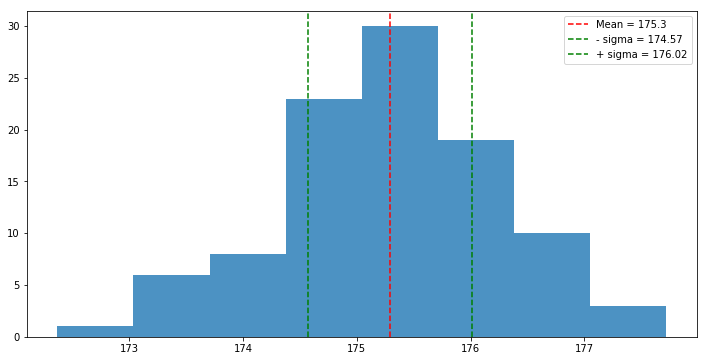

In [17]:
means = []
stds = []
for i in range(100):
    sample = np.random.choice(height_gen_pop, size=n_of_people)
    means.append(np.mean(sample))
    stds.append(np.std(sample, ddof=1))
    
norm_hist(means, np.mean(means), np.std(stds, ddof=1))

Как видим, среднее выборочных средних близко к среднему по всей совокупности, что и логично. Однако, стандартное отклонение средних не равно стандартному отклонению совокупности. Оно является мерой точности, с которой выборочное среднее значение является оценкой среднего по совокупности. Поэтому это значение носит название стандартной ошибки среднего. Выводится следующая формула для стандартной ошибки среднего:

**Истинная стандартная ошибка среднего:** $\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{N}}$.

**Стандартная ошибка оценки по данной выборке:** $s_{\bar{x}} = \frac{s}{\sqrt{n}}$.

Чем больше выборка, тем точнее оценка среднего и тем меньше его стандартная ошибка. Чем больше изменчивость исходной совокупности, тем больше изменчивость выборочных средних, поэтому стандартная ошибка среднего возрастает с увеличением стандартного отклонения совокупности. В отличие от стандартного отклонения стандартная ошибка среднего ничего не говорит о разбросе данных, — она лишь показывает точность выборочной оценки среднего.

### Статистические гипотезы

**Статистическая гипотеза** - предположение о виде распределения и свойствах случайной величины, которое можно подтвердить или опровергнуть применением статистических методов к данным выборки. Проверка статистических гипотез является содержанием одного из обширных классов задач математической статистики.

Дадим определение. Пусть в (статистическом) эксперименте доступна наблюдению случайная величина $X$, распределение которой $\mathbb{P}$ полностью или частично неизвестно. Тогда любое утверждение относительно $\mathbb {P}$  называется **статистической гипотезой**.

Выдвинутая гипотеза нуждается в проверке, которая осуществляется статистическими методами, поэтому гипотезу называют статистической. Для проверки гипотезы используют критерии, позволяющие принять или опровергнуть гипотезу. В большинстве случаев статистические критерии основаны на случайной выборке $(X_{1},X_{2},\dots ,X_{n})$ фиксированного объема $n\geq 1$ для распределения $\mathbb  P$. 

Дадим еще несколько определений понятий, учавствующих в проверке статистических гипотез.

**Статистический критерий** - строгое математическое правило, по которому принимается или отвергается та или иная статистическая гипотеза с известным уровнем значимости. Построение критерия представляет собой выбор подходящей функции от результатов наблюдений (ряда эмпирически полученных значений признака), которая служит для выявления меры расхождения между эмпирическими значениями и гипотетическими.

**Уровень значимости** - вероятность того, что при условии верности нулевой гипотезы будут обнаружены различия, равные наблюдаемым или превосходящие их. Таким образом, уровень $\alpha$  значимости теста — вероятность отклонить гипотезу $H_0$, если на самом деле она верна (решение известное как ошибка первого рода, или ложноположительное решение).

**Ошибка первого рода (ложноположительное решение, false positive)** - отклонение гипотезы $H_0$, когда она на самом деле верна (найти различия там, где их нет). Например, анализ данных о платежах клиента показал наличие аномалий (то есть возможную кражу денег со счета), хотя на самом деле этого не происходило.

**Ошибка второго рода (ложноотрицательное решение, false negative)** - принятие гипотезы $H_0$, когда она на самом деле не является верной (не заметить различий там, где они на самом деле есть). Например, анализатор спама в почтовом сервисе пропустил рекламное письмо из за недостаточной чувствительности.

**Этапы проверки статистических гипотез:**
1. Формулировка основной гипотезы $H_{0}$ и конкурирующей гипотезы $H_1$.
2. Задание уровня значимости $\alpha$ , на котором в дальнейшем и будет сделан вывод о справедливости гипотезы. Он равен вероятности допустить ошибку первого рода.
3. Расчёт статистики $\phi$  критерия такой, что:
    1. Её величина зависит от исходной выборки ${\mathbf  {X}}=(X_{1},\ldots ,X_{n}):\;\phi =\phi (X_{1},\ldots ,X_{n})$;
    2. По её значению можно делать выводы об истинности гипотезы $H_{0}$;
    3. Статистика $\phi$, как функция случайной величины $\mathbf {X}$, также является случайной величиной и подчиняется какому-то закону распределения.
4. Построение критической области. Из области значений $\phi$  выделяется подмножество $\mathbb {C}$  таких значений, по которым можно судить о существенных расхождениях с предположением. Его размер выбирается таким образом, чтобы выполнялось равенство $P(\phi \in {\mathbb  {C}})=\alpha $. Это множество $\mathbb {C}$  и называется критической областью.
5. Вывод об истинности гипотезы. Наблюдаемые значения выборки подставляются в статистику $\phi$  и по попаданию (или непопаданию) в критическую область $\mathbb {C}$  выносится решение об отвержении (или принятии) выдвинутой гипотезы $H_{0}$.

Поговорим немного о статистических критериях. Она подразделяются на следующие категории:
1. Критерии значимости. Проверка на значимость предполагает проверку гипотезы о численных значениях известного закона распределения: $H_{0}: a=a_{0}$ — нулевая гипотеза. $ H_{1}: a>a_{0} (a<a_{0})$ или $ a\neq a_{0}$ — конкурирующая гипотеза.
2. Критерии согласия. Проверка на согласие подразумевает проверку предположения о том, что исследуемая случайная величина подчиняется предполагаемому закону. Критерии согласия можно также воспринимать как критерии значимости.
3. Критерии проверки на однородность. При проверке на однородность случайные величины исследуются на факт значимости различия их законов распределения (т.е. проверки того, подчиняются ли эти величины одному и тому же закону).

Это разделение условно, и зачастую один и тот же критерий может быть использован в разных качествах.

Также важно отметить, что критерии делятся на параметрические и непараметрические. Первые включают в расчет параметры вероятностного распределения признака, вторые же основаны на оперировании частотами или рангами.

### Критерии согласия*

Так как многие критерии предназначены только для одного типа распределений, перед их применением необходимо произвести проверку исследумеой выборки на принадлежность к инстересующему распределению.

В общем виде, нулевая гипотеза при применении критериев согласия строится следующим образом: $ H_0: F_n(x) = F(x) $, где $F_n(x)$ - эмпирическая функция распределения, $F(x)$ - теоретическая функция распределения.

Часто используемым критерием для проверки гипотезы о принадлежности наблюдаемой выборки $x_{1},x_{2},...,x_{n}$ объёмом $n$ некоторому теоретическому закону распределения является **критерий согласия Пирсона**. Его суть заключается в следующем: диапазон изменения экспериментальных данных разбивается на $k$ интервалов и подсчитывается статистика: 

$$ \chi^2 = \sum_{i=1}^{k}\frac{n_i - np_i}{np_i}, $$

где $n_i$ - количство значений случайно величины, попавших в $i$-ый интервал, $p_i = F(x_{i+1}) - F(x_i)$ - теоретическая вероятность попадания величины в  $i$-ый интервал.

На мощноть критерия сильное влияние оказывает число разбиений $k$. Существуют разные подходы к определению характера разбиений, однако существует одно простое и более-менее эффективное првило: следует выбирать максимальное $k$, но не более $\frac{n}{5}$.

Данная статистика имеет распределение хи-квадрат с $f=n-1$ степенями свободы. Таким образом, если значение статистики $\chi^2 > \chi_{\alpha}(f)^2$, то нулевая гипотеза отклоняется при уровне значимости $\alpha$.

#### Проверка нормальности распределения

Так как нормальное распределение повсеместо распространено, было разработано множество критериев, работающих именно с ним (будут разобраны далее).

Одним из самых популярных и эффективных критериев нормальности является **критерий Шапиро-Уилка**. Статистика критерия имеет вид: 

$$ W = \frac{1}{s^2}\left[\sum_{i=1}^{n}a_{n-i+1}(x_{n-i+1} - x_i)\right]^2, $$
где $ s^2 = \sum_{i=1}^{n}(x_i-\bar{x}), \; \bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i $, значения коэфициента $a_{n-i+1}$ берутся из специальной таблицы.

Если значение статистики $ W < W(\alpha) $, то нулевая гипотеза о нормальности распределения отклоняется при уровне значимости $\alpha$. Критические значения так же берутся из таблицы, либо находятся с помощью аппроксимаций.

Еще одним мощным тестом нормальности является **критерий $K^2$**. Почитать о нем можно [здесь](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test).

#### Пример проверки гипотезы о нормальности

Прежде чем приступать к применению критериев на практике, следует затронуть еще одну тему, касающегося определения P-значения. Здесь не просто так не приводятся (и не будут) таблицы критических значений и коэфициентов статистик. Все расчеты будут производиться с помощью специально разработанных для этого библиотек на языке Python. И в качестве реузльтата большинство функций расчета статистик критериев возвращают кортеж из статистики критерия и P-значения.

Так вот, по определению, P-значение (англ. P-value) — вероятность получить для данной вероятностной модели распределения значений случайной величины такое же или более экстремальное значение статистики (среднего арифметического, медианы и др.), по сравнению с ранее наблюдаемым, при условии, что нулевая гипотеза верна.

Может показаться сложным, поэтому, другими словами, p - вероятность ошибочно отвергнуть верную нулевую гипотезу, то есть найти различия там, где их нет. Получается, что чем меньше значение p, тем больше вероятность того, что нулевая гипотеза неверна. Таким образом, при p < $\alpha$ нулевая гипотеза отклоняется, как говорят, при уровне значимости $\alpha$.

Для любителей математики, формальное определение: пусть $T(X)$ — статистика, используемая при тестировании некоторой нулевой гипотезы $H_{0}$. Предполагается, что если нулевая гипотеза справедлива, то распределение этой статистики известно. Обозначим функцию распределения $F(t)=P(T<t)$. P-значение чаще всего (при проверке правосторонней альтернативы) определяется как: $P(t)=P(T>t)=1-F(t)$. При проверке левосторонней альтернативы: $P_{0}(t)=P(T<t)=F(t)$. В случае двустороннего теста p-значение равно: $P(t)=2\min(P_{0}, P)$.

Сгенерируем выборку из стандартного нормального распределения, но подвергнем её шуму:

In [84]:
def get_random_sample(size, a=0, b=1):
    return (b-a) * np.random.sample(size) + a

In [101]:
sample_noised = stats.norm(loc=0, scale=1).rvs(100) + get_random_sample(100, -1.5, 1.5)

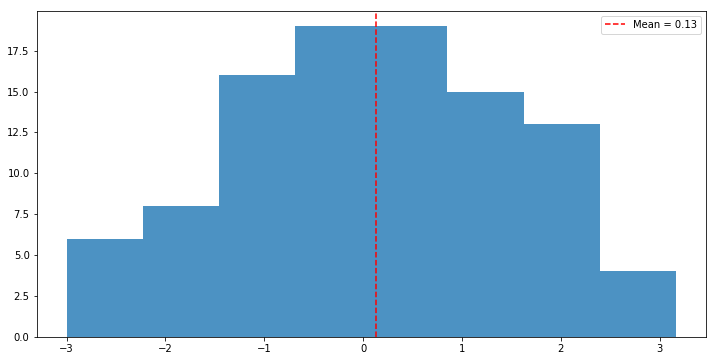

In [102]:
norm_hist(sample_noised, np.mean(sample_noised))

Применим критерий Шапиро-Уилка:

In [103]:
(W, p_shapiro) = stats.shapiro(sample_noised)
print("Значение статистики: " + str(W))
print("p-value: " + str(p_shapiro))

Значение статистики: 0.9865853190422058
p-value: 0.41034919023513794


Так как шум невелик, $p > \alpha$ и гипотеза о нормальности распределения принимается при уровне значимости $\alpha = 0.05$ (наиболее популярный уровень). Однако, чем ближе $p$ к уровню $\alpha$, тем выше вероятность того, что на самом деле мы ошибаемся и нулевая гипотеза неверна.

Применим критерий $K^2$:

In [104]:
(K, p_k) = stats.normaltest(sample_noised)
print("Значение статистики: " + str(K))
print("p-value: " + str(p_k))

Значение статистики: 3.5034815179507603
p-value: 0.17347170803452353


Гипотеза о нормальности так же принимается на уровне значимости $\alpha = 0.05$, однако p-value здесь меньше.

В качестве бонуса можно рассмотреть очень простой пример проверки соответствия экспериментального распределения теоретическому - Q–Q (quantile-quantile) plot. Суть его в следующем: 
1. Рассматриваем $k$-квантиль теоретического распределения, то есть значение $x_k : F(x_{k}) = k$, затем $k$-квантиль выборки $\hat{x_k}$;
2. Наносим на график точку $(x_k, \hat{x_k})$;
3. Повторяем процедуру для всех $k \in (0, 1)$ с некоторым шагом.

Если все точки лежат на одной прямой линии, значит распределения совпадают.

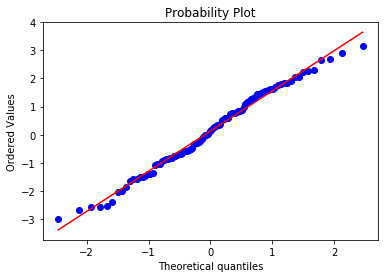

In [105]:
stats.probplot(sample_noised, dist="norm", plot=plt)
plt.show()

Как видим, точки лежат примерно на одной прямой, поэтому мы можем отнести рассматриваемую выборку к нормально распределенной.

<br>

<br>

### Примечание

**Автор: Болгарин Максим. Физический факультет, МГУ, 2019г.**

Данной работой я хотел донести до начинающих программистов и аналитиков основы математической статистики на базовом и понятном для каждого уровне. Моей целью не было просто переписать информацию из учебников и интернет статей, а сгруппировать её в понятном и информативном виде.

#### Источники:
1. [Wikipedia](https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0)
2. [Стентон Гланц - Медико-биологическая статистика](https://yadi.sk/i/6A1LLMU78QqNPg)
3. [Кобзарь А. И. - Прикладная математическая статистика](https://yadi.sk/i/GDGalzNXL0HsMA)